In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [10]:
df = pd.read_csv('SalesAnalysis/Sales_Data/Sales_April_2019.csv')

In [11]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Task1: Merge the 12 Months of Sales Data into a Single CSV file 

In [13]:
files = [file for file in os.listdir('SalesAnalysis/Sales_Data')]

In [14]:
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [72]:
df = pd.DataFrame()
for file in files:
    data = pd.read_csv(f'SalesAnalysis/Sales_Data/{file}')
    df = pd.concat([df,data])
    #print(len(df))


In [73]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [74]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [75]:
df.dropna(inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [77]:
print(df.loc[517, 'Order Date'])

517    04/24/19 20:45
517    08/31/19 20:37
517    12/08/19 20:30
517    02/22/19 16:02
517    01/27/19 10:55
517    07/17/19 20:11
517    06/28/19 15:20
517    03/31/19 19:57
517    05/15/19 11:50
517    11/04/19 22:12
517    10/06/19 23:14
517    09/13/19 15:46
Name: Order Date, dtype: object


In [78]:
df['month'] = df['Order Date'].str[0:2].astype('int32',errors='ignore')

In [79]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [80]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

In [81]:
df['revenue'] = df['Quantity Ordered'] * df['Price Each']

In [82]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,revenue
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99


<Axes: xlabel='month'>

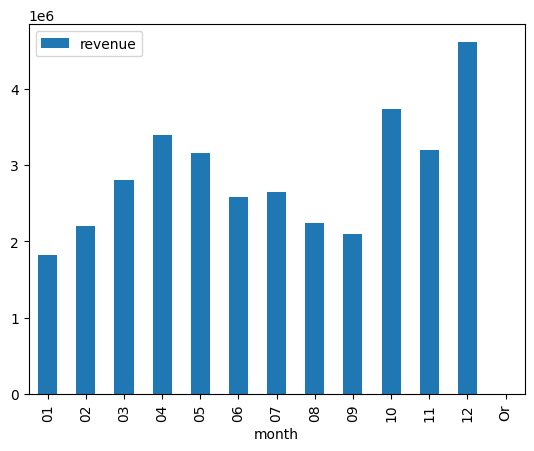

In [83]:
df.groupby(['month'])['revenue'].sum().reset_index().sort_values(by='month',ascending=True).plot(kind='bar',x='month',y='revenue')

In [84]:
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,revenue
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [104]:
df['city'] = df['Purchase Address'].str.split(',').str[1]

In [118]:
df.groupby('city')['revenue'].sum().reset_index()['revenue']#.max()

0    2795498.58
1    1819581.75
2    3661642.01
3    2767975.40
4    5452570.80
5    4664317.43
6    2320490.61
7    8262203.91
8    2747755.48
Name: revenue, dtype: float64

# What products are most often sold together ?

In [119]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,revenue,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles


In [120]:
data = df[df['Order ID'].duplicated(keep=False)]

In [121]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,revenue,city
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles
30,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",04,99.99,Boston
...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1.0,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",09,3.84,Atlanta
11639,259314,Wired Headphones,1.0,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",09,11.99,Atlanta
11640,259314,AAA Batteries (4-pack),2.0,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",09,5.98,Atlanta
11677,259350,Google Phone,1.0,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",09,600.00,San Francisco


In [122]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [123]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,revenue,city,Grouped
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,Bose SoundSport Headphones
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,Wired Headphones
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles,AAA Batteries (4-pack)
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco,iPhone
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco,iPhone
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco,34in Ultrawide Monitor


In [125]:
#Now remove the duplicated order id
data1 = df[['Order ID','Grouped']].drop_duplicates()

In [126]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,revenue,city
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles
30,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",04,99.99,Boston
...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1.0,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",09,3.84,Atlanta
11639,259314,Wired Headphones,1.0,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",09,11.99,Atlanta
11640,259314,AAA Batteries (4-pack),2.0,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",09,5.98,Atlanta
11677,259350,Google Phone,1.0,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",09,600.00,San Francisco


In [127]:
from itertools import combinations
from collections import Counter

In [128]:
count = Counter()

In [129]:
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

In [130]:
count.most_common(10)

[(('Product', 'Product'), 22306425),
 (('iPhone', 'Lightning Charging Cable'), 2140),
 (('Google Phone', 'USB-C Charging Cable'), 2116),
 (('iPhone', 'Wired Headphones'), 987),
 (('Google Phone', 'Wired Headphones'), 949),
 (('iPhone', 'Apple Airpods Headphones'), 799),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 773),
 (('Google Phone', 'Bose SoundSport Headphones'), 503),
 (('USB-C Charging Cable', 'Wired Headphones'), 452),
 (('Vareebadd Phone', 'Wired Headphones'), 327)]

### Question 5 : What products sold the most ? Why do you think it sold the most ?

In [131]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,revenue,city,Grouped
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,Bose SoundSport Headphones
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,Wired Headphones


In [132]:
product_group = df.groupby('Product')

In [134]:
quantity_ordered = product_group.sum()['Quantity Ordered']

In [135]:
products = [product for product , df in product_group]

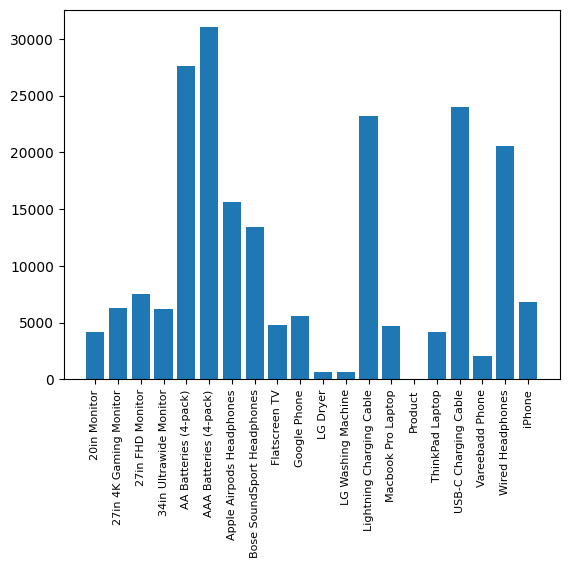

In [137]:
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation= 'vertical',size= 8)
plt.show()

In [139]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,revenue,city,Grouped
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,Bose SoundSport Headphones
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,Wired Headphones
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles,AAA Batteries (4-pack)
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco,iPhone
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco,iPhone
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco,34in Ultrawide Monitor


In [140]:
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')


In [144]:
prices = df.groupby('Product')['Price Each'].mean().reset_index()

In [145]:
prices

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


In [147]:

prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

TypeError: agg function failed [how->mean,dtype->object]